# Capstone: Voice-Based Health Classification

Project Overview: To analyze a dataset containing audio-derived features extracted from voice recordings of patients labeled as "Healthy" and "Unhealthy". Goals include performing EDA and building a predictive model to classify patients based on their health status.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sounds_df = pd.read_excel("/content/VowelA_High_latest.xlsx", sheet_name='in')

# Summarised Dataset Statistics

In [68]:
sounds_df.shape

(2035, 32)

In [69]:
sounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2035 non-null   int64  
 1   filename            2035 non-null   object 
 2   chroma_stft         2035 non-null   float64
 3   rmse                2035 non-null   float64
 4   spectral_centroid   2035 non-null   float64
 5   spectral_bandwidth  2035 non-null   float64
 6   rolloff             2035 non-null   float64
 7   zero_crossing_rate  2035 non-null   float64
 8   mfcc1               2035 non-null   float64
 9   mfcc2               2035 non-null   float64
 10  mfcc3               2035 non-null   float64
 11  mfcc4               2035 non-null   float64
 12  mfcc5               2035 non-null   float64
 13  mfcc6               2035 non-null   float64
 14  mfcc7               2035 non-null   float64
 15  mfcc8               2035 non-null   float64
 16  mfcc9 

In [70]:
sounds_df.isnull().sum()

,0
Unnamed: 0,0
filename,0
chroma_stft,0
rmse,0
spectral_centroid,0
spectral_bandwidth,0
rolloff,0
zero_crossing_rate,0
mfcc1,0
mfcc2,0


In [71]:
sounds_df.duplicated(subset='ID').sum()

np.int64(0)

We can see that there are no pieces of missing or duplicated data

In [72]:
# Create Age Bracket Buckets
conditions = [
    sounds_df['A'] <= 18,
    sounds_df['A'] <= 30,
    sounds_df['A'] <= 45,
    sounds_df['A'] <= 60,
    sounds_df['A'] <= 75
]

labels = [
    "9–18",
    "19–30",
    "31–45",
    "46–60",
    "61–75"
]

# Create new column
sounds_df['Age_Bucket'] = np.select(conditions, labels, default="76+")

In [73]:
sounds_df.head()

,Unnamed: 0,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,ID,G,A,Age_Bucket
0,0,1-a_h.wav,0.127341,0.355538,1587.507015,2002.198851,2737.971816,0.066798,-233.566208,48.504421,...,1.143172,4.134034,52.794827,39.092403,49.037060,Healthy,1,w,20,19–30
1,1,10-a_h.wav,0.215317,0.250342,1272.900724,1850.302841,1692.919922,0.043325,-179.419601,119.705742,...,-7.037875,-9.193601,11.183559,-2.173607,-9.420938,Healthy,10,w,22,19–30
2,2,100-a_h.wav,0.212512,0.251419,919.203795,1014.718104,1275.967478,0.047079,-209.186188,167.135651,...,-4.153456,-2.725145,-10.669723,-2.336876,7.741264,Healthy,100,m,66,61–75
3,3,1000-a_h.wav,0.198861,0.157396,1119.517351,1529.490600,1501.657586,0.045487,-210.244278,139.819519,...,7.797343,-26.314997,-6.622046,0.535120,0.749695,Healthy,1000,m,31,31–45
4,4,1002-a_h.wav,0.370113,0.143538,1060.678054,1346.299507,1524.942294,0.050109,-175.039948,181.905212,...,13.306650,-26.597456,-8.324528,10.786009,-6.677513,Healthy,1002,m,25,19–30


In [74]:
sounds_df.value_counts('label')

,count
label,
Unhealthy,1348
Healthy,687


In [75]:
sounds_df.value_counts('G')

,count
G,
w,1155
m,880


In [76]:
sounds_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2035.0,1017.000000,587.598219,0.000000,508.500000,1017.000000,1525.500000,2034.000000
chroma_stft,2035.0,0.226609,0.065532,0.120402,0.182932,0.213884,0.251294,0.614178
rmse,2035.0,0.192420,0.064474,0.015067,0.147187,0.186241,0.231145,0.463574
spectral_centroid,2035.0,1316.674901,401.289370,566.319248,1056.073776,1233.786591,1468.926577,4295.111712
spectral_bandwidth,2035.0,1684.033835,434.532199,830.011306,1376.519591,1592.463814,1905.480356,3403.279259
rolloff,2035.0,2092.416751,1243.021777,698.962823,1311.850933,1627.910156,2419.182517,8581.931440
zero_crossing_rate,2035.0,0.054684,0.020236,0.012267,0.043071,0.053438,0.063741,0.271903
mfcc1,2035.0,-204.067168,46.305767,-364.190887,-233.579994,-206.244324,-176.142578,5.806334
mfcc2,2035.0,126.722018,30.334038,34.765537,105.017399,125.547623,147.534126,231.070160
mfcc3,2035.0,-22.393496,26.034214,-98.049812,-40.443611,-22.962688,-4.733893,62.088444


# Distributions of Features

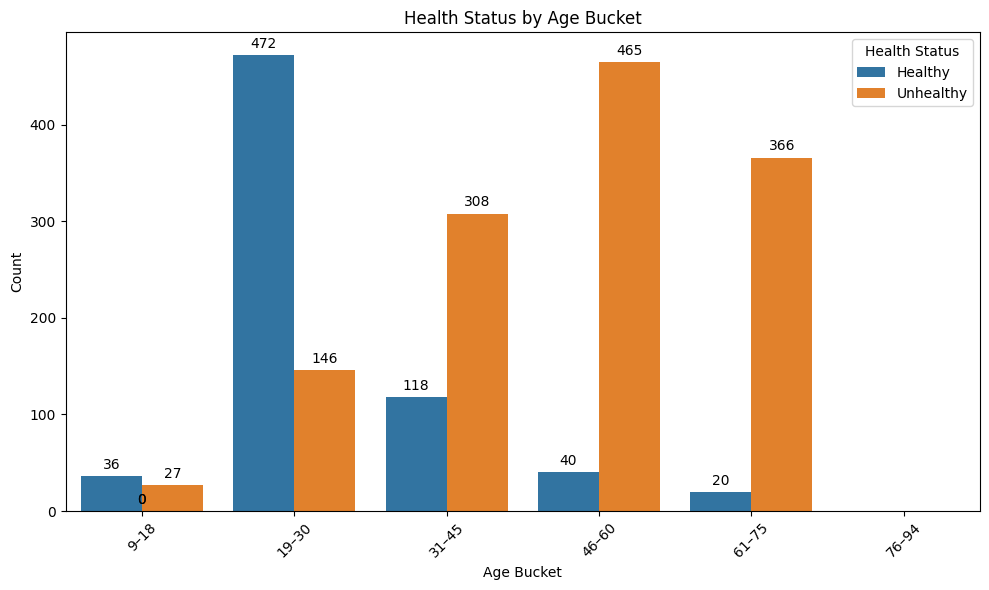

In [77]:
# Step 1: Define age bucket order
bucket_order = ["9–18", "19–30", "31–45", "46–60", "61–75", "76–94"]

# Step 2: Group by Age Bucket and Health Label
age_health_counts = sounds_df.groupby(['Age_Bucket', 'label']).size().reset_index(name='count')

# Step 3: Create bar chart with correct order
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=age_health_counts, x='Age_Bucket', y='count', hue='label', order=bucket_order)

# Step 4: Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 8), textcoords='offset points')

# Step 5: Customize chart
plt.title('Health Status by Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Health Status')
plt.tight_layout()
plt.show()


Observation: Quantity of unhealthy individuals massively increases as age bracket increases. Most healthy inidividuals are in the 19-30 age bracket.

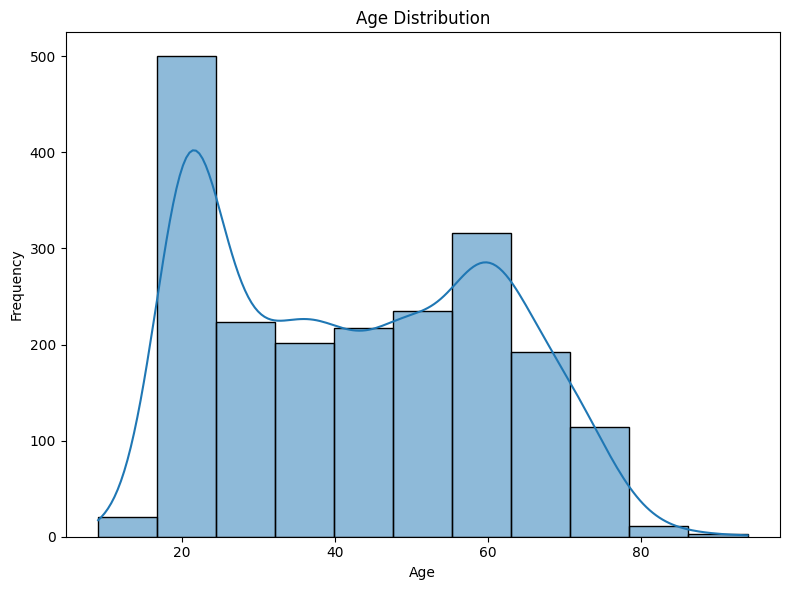

In [78]:
plt.figure(figsize=(8, 6))
sns.histplot(data=sounds_df, x='A', bins=11, kde=True)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Observation: The most frequently assessed individuals were around their early 20's, folowed by their late 50s, which may explain some of the previous figures on healthy and unhealthy.

Recommendation: Would reccomend larger sample size across other categories ideally.

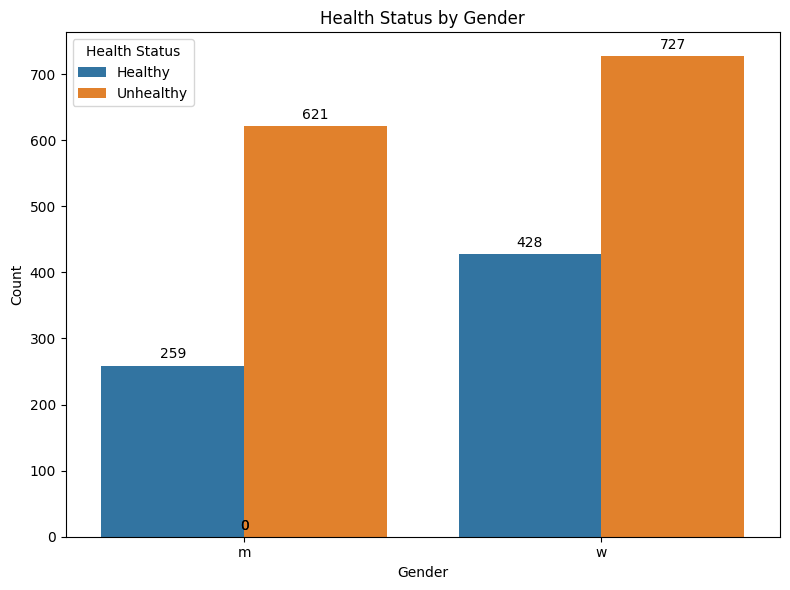

In [79]:
# Step 1: Group counts by gender and label
health_gender_counts = sounds_df.groupby(['G', 'label']).size().reset_index(name='count')

# Step 2: Create bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(data=health_gender_counts, x='G', y='count', hue='label')

# Step 3: Add data labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 8), textcoords='offset points')

# Step 4: Customize chart
plt.title('Health Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Health Status')
plt.tight_layout()
plt.show()

Observation: Both genders have more unhealthy inidivudals that healthy and more so with women.

# Further feature analysis

In [80]:
# Gathering numerical and categorical features into buckets for easier future analysis by group
mfcc_cols = [f'mfcc{i}' for i in range(1, 21)]
features_to_scale = mfcc_cols + ['A','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate']
categorical_cols = ['label', 'G', 'Age_Bucket']

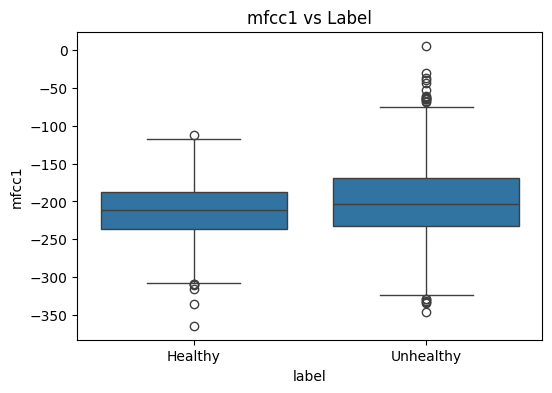

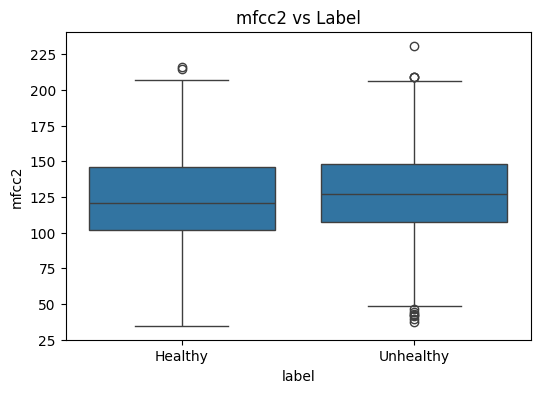

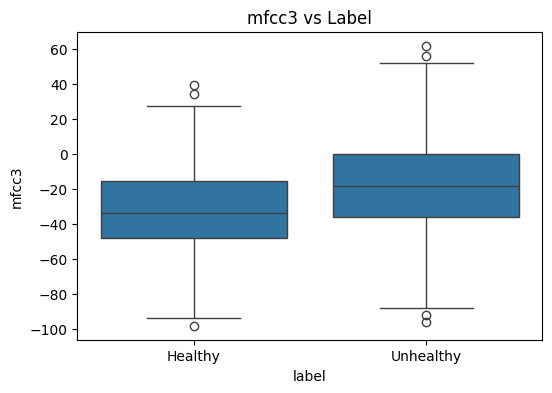

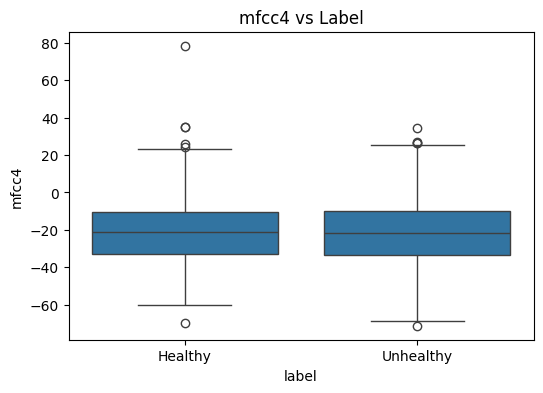

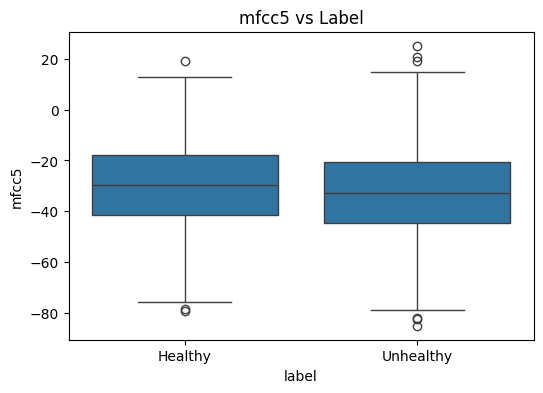

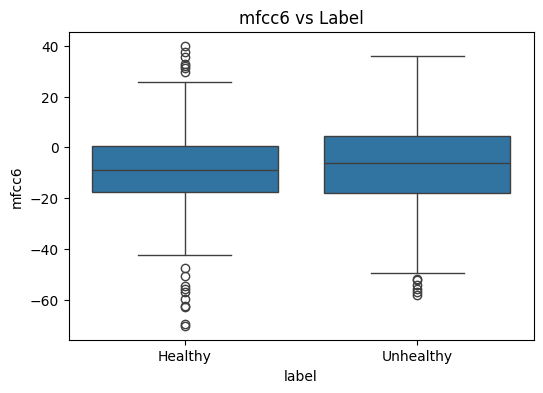

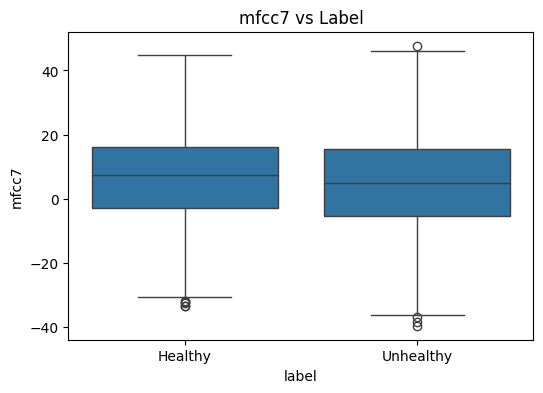

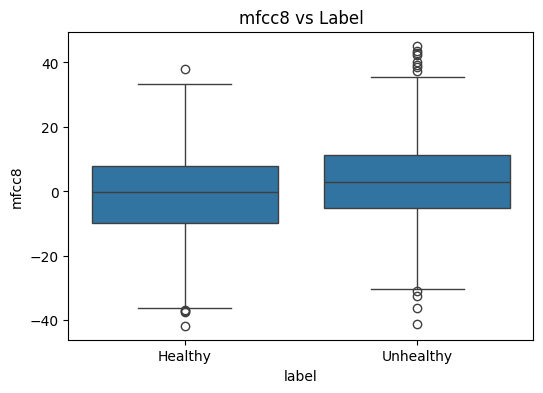

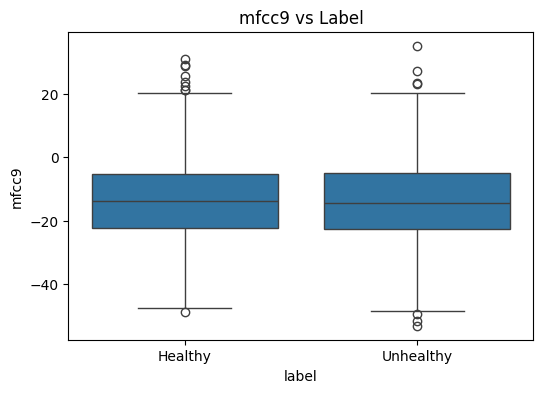

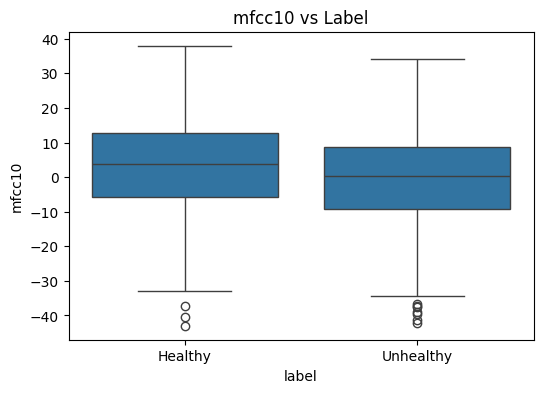

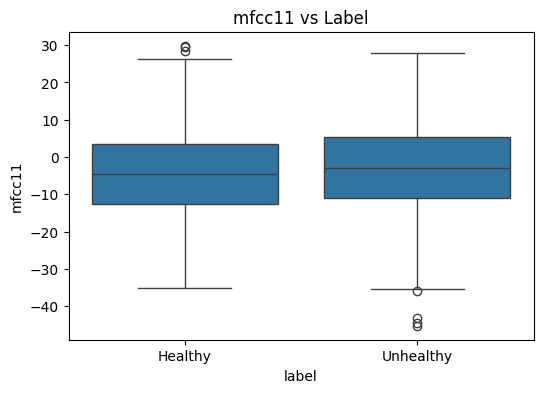

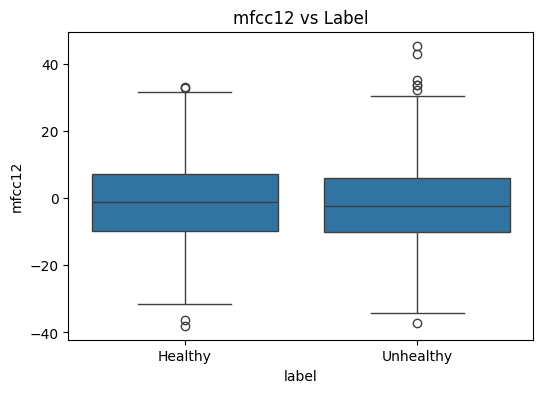

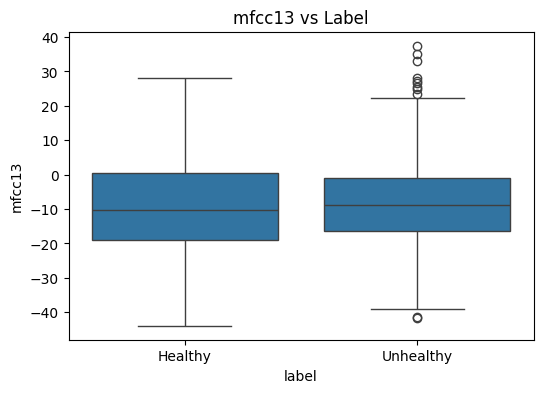

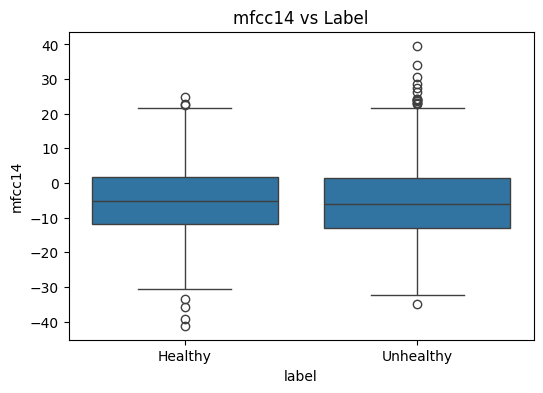

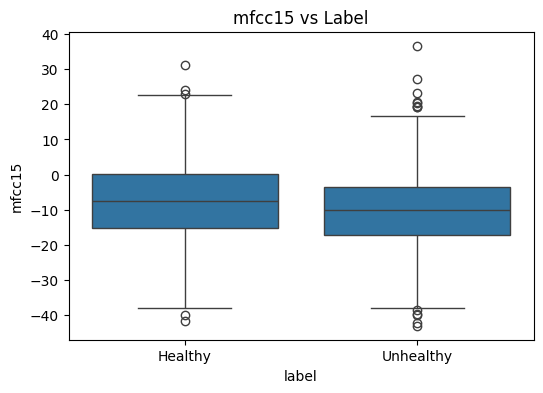

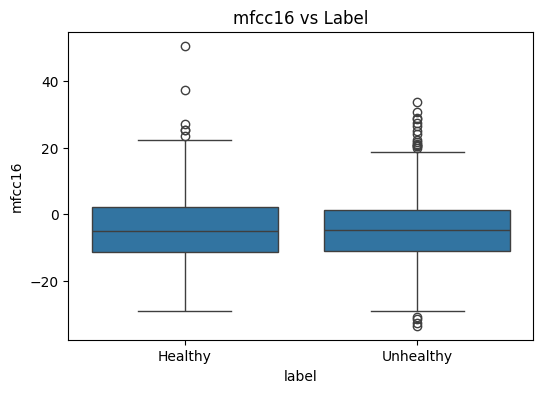

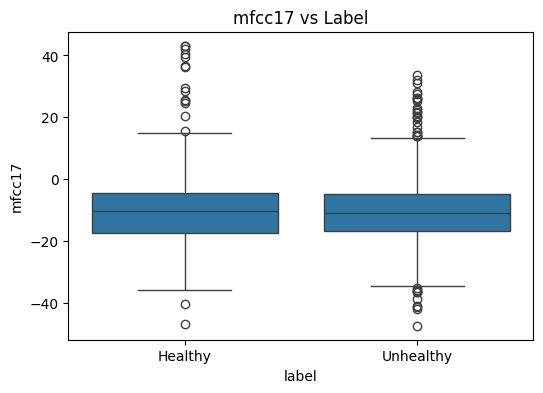

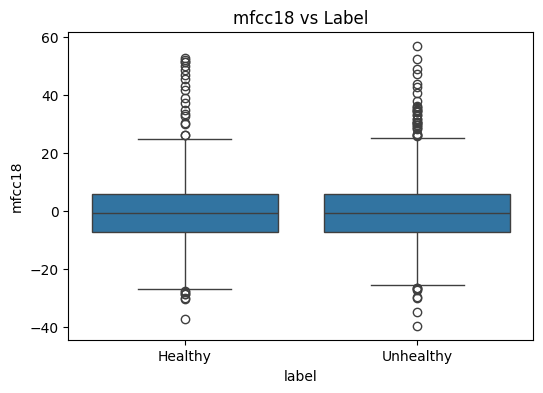

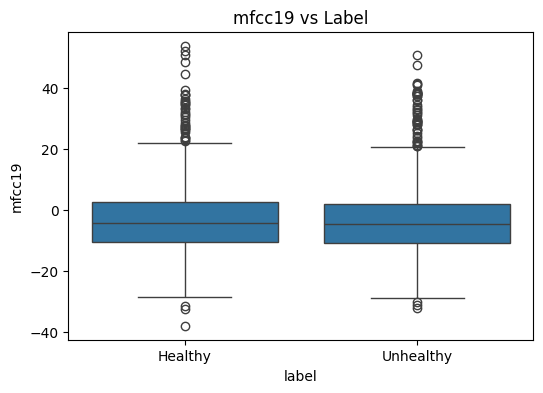

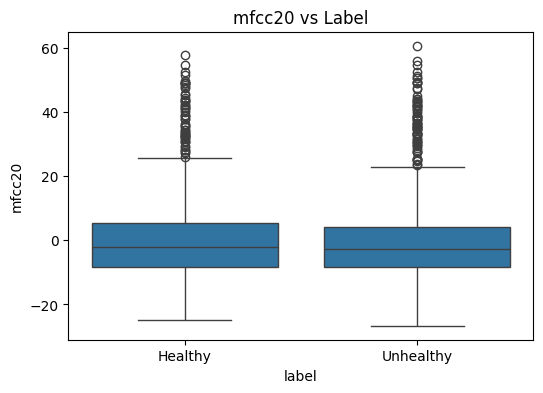

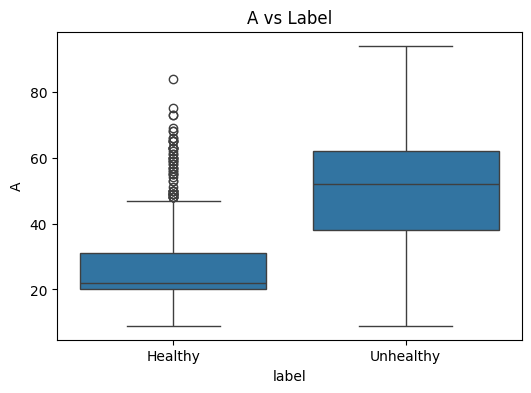

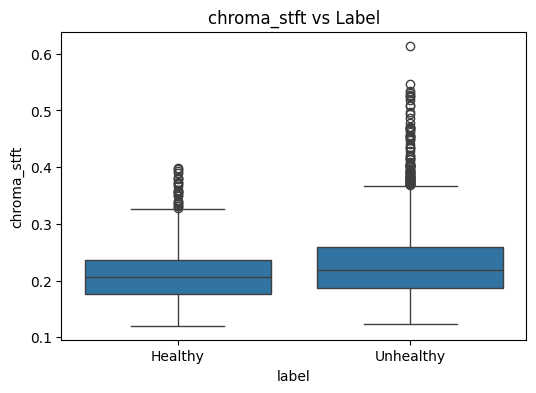

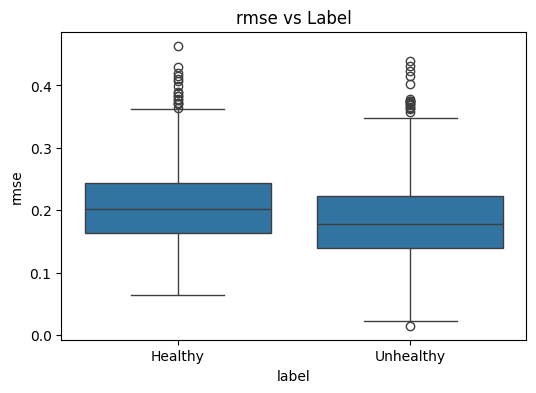

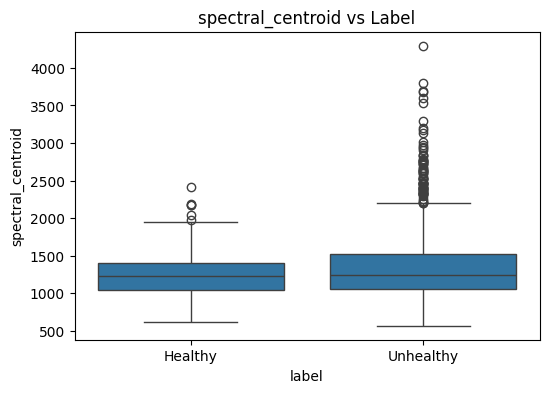

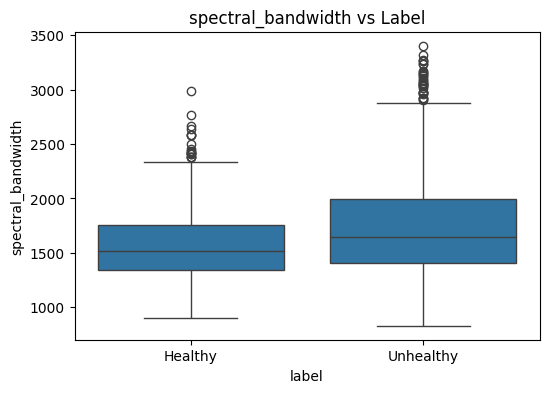

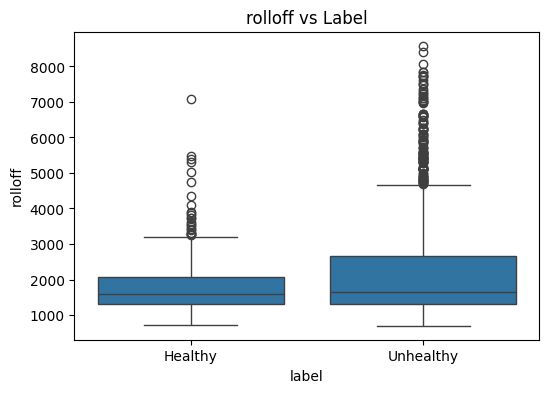

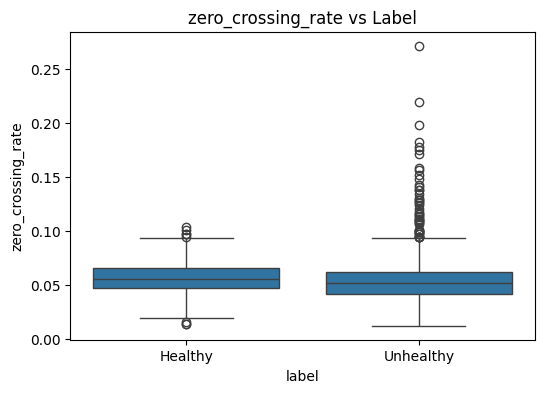

In [81]:
# Boxplots for all numerical features to visually see distributions and outliers split by health status
for col in features_to_scale:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='label', y=col, data=sounds_df)
    plt.title(f'{col} vs Label')
    plt.show()

# Feature Encoding and Feature Correlation

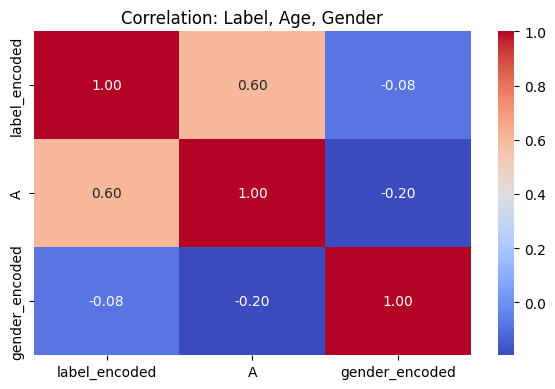

In [82]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode categorical variables

le_label = LabelEncoder()
le_gender = LabelEncoder()

sounds_df['label_encoded'] = le_label.fit_transform(sounds_df['label'])   # Healthy/Unhealthy → 0/1
sounds_df['gender_encoded'] = le_gender.fit_transform(sounds_df['G'])     # m/f → 0/1

# Step 2: Select relevant columns
corr_features = ['label_encoded', 'A', 'gender_encoded']

# Step 3: Compute correlation matrix
corr_matrix = sounds_df[corr_features].corr()

# Step 4: Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Label, Age, Gender')
plt.tight_layout()
plt.show()


Observation: It is not the strongest correlation, but age is correlated postively to health status (specifically as age increase, being unhealth does too)

# Feature Normalisation/Encoding in Preperation for Predictive Model Creation

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mfcc_sounds_df = scaler.fit_transform(sounds_df[features_to_scale])

encoded_catergorical_df = pd.DataFrame()
for col in categorical_cols:
    le = LabelEncoder()
    encoded_catergorical_df[col + '_encoded'] = le.fit_transform(sounds_df[col])

In [84]:
mfcc_scaled_df = pd.DataFrame(mfcc_sounds_df, columns=features_to_scale)

# Create a list of columns to drop from the original sounds_df
cols_to_drop = features_to_scale + categorical_cols

final_df = pd.concat([
    sounds_df.drop(columns=cols_to_drop),
    mfcc_scaled_df,
    encoded_catergorical_df
], axis=1)

In [85]:
final_df.head(10)

,Unnamed: 0,filename,ID,label_encoded,gender_encoded,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,A,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,label_encoded,G_encoded,Age_Bucket_encoded
0,0,1-a_h.wav,1,0,1,-0.637206,-2.579176,-0.465832,-0.893467,-0.666730,...,-1.253884,-1.515187,2.530584,0.675071,0.732381,0.519471,0.598815,0,1,0
1,1,10-a_h.wav,10,0,1,0.532409,-0.231357,0.894264,-0.239770,1.167497,...,-1.143581,-0.172368,0.898592,-0.109111,0.382733,-0.321471,-0.561440,0,1,0
2,2,100-a_h.wav,100,0,0,-0.110575,1.332614,-0.576487,0.509713,1.049791,...,1.283100,-0.215172,0.915291,-0.990728,-1.540692,-0.656988,-0.375874,0,0,3
3,3,1000-a_h.wav,1000,0,0,-0.133431,0.431882,0.561687,2.044166,-1.210501,...,-0.647214,-0.423536,-0.543369,-0.491431,-0.355742,-0.475377,-0.454574,0,0,1
4,4,1002-a_h.wav,1002,0,0,0.627014,1.819631,-0.414484,1.236359,1.128392,...,-0.978125,2.190365,-0.758351,-0.638093,-0.777428,-0.456640,-0.226118,0,0,0
5,5,1003-a_h.wav,1003,0,0,-0.384536,1.828198,0.152726,-0.211772,-0.258355,...,-0.426607,0.095994,0.359021,-1.105797,-1.479483,-0.788869,-0.396775,0,0,1
6,6,1004-a_h.wav,1004,0,0,1.257744,1.586369,-0.433245,0.598452,0.449783,...,-0.536911,1.605801,0.600145,-0.595379,-0.876736,-0.589146,-0.445682,0,0,1
7,7,1005-a_h.wav,1005,0,0,0.322190,1.966312,1.341358,1.600211,-0.273344,...,0.014608,0.253257,0.347512,-1.105079,-0.924632,-0.824032,-0.707478,0,0,1
8,8,1006-a_h.wav,1006,0,1,-1.125832,0.040621,1.391424,-0.588849,0.189324,...,-0.592062,-0.507162,-0.125510,-0.624581,0.048967,-0.731794,-0.571442,0,1,1
9,9,1007-a_h.wav,1007,0,0,-0.048924,0.169570,-0.584646,1.224308,-0.413175,...,-0.040544,0.001619,0.164468,-0.576398,-0.920277,-0.455356,-0.573122,0,0,1


# Predictive Model Creation and Visualisation

In [86]:
# Split features from target variable
X = final_df.drop(columns=['label_encoded','Unnamed: 0','filename','ID'])  # Features
y = final_df['label_encoded'].squeeze()                 # Target

In [87]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Algorithm Experimentation (Decision Tree + Random Forest)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


Model Evaluations

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

print("Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix (RF):\n", confusion_matrix(y_test.values.flatten(), y_pred_rf.flatten()))

Decision Tree:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       270
           1       0.82      0.83      0.83       270

   micro avg       0.82      0.83      0.83       540
   macro avg       0.82      0.83      0.83       540
weighted avg       0.82      0.83      0.83       540
 samples avg       0.55      0.55      0.55       540

Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       270
           1       0.88      0.89      0.88       270

   micro avg       0.88      0.89      0.88       540
   macro avg       0.88      0.89      0.88       540
weighted avg       0.88      0.89      0.88       540
 samples avg       0.59      0.59      0.59       540

Confusion Matrix (RF):
 [[206  68]
 [ 62 478]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

Observation: Random Forest has a higher score across all evaluation metrics across the board

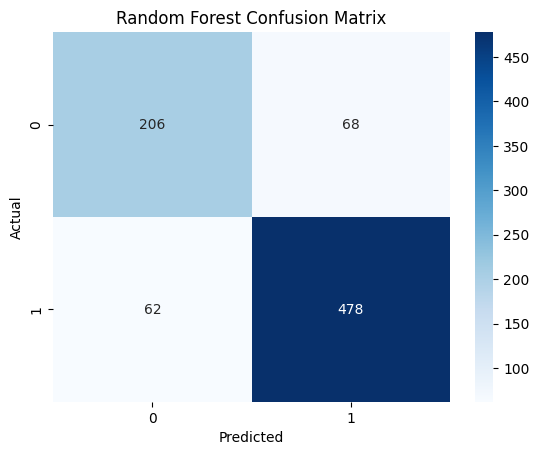

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

# Ensure y_test and y_pred_rf are in the correct format
cm = confusion_matrix(y_test.values.flatten(), y_pred_rf.flatten())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Observations: The RF model performs well overall (especially when catching unhealthy cases), but there are a decent number of individuals who are healthy who are misclassified.

62 unhealthy individuals were missed, which could be risky if used for early detection or triage. Would reccomend classification threshold to be adjusted to reduce false negatives, with risk of increasing false positives.